In [24]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

def img_show(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure("Image") # 图像窗口名称
    plt.imshow(img_rgb)
    plt.axis('off') # 关掉坐标轴为 off
    plt.show()

color_dist = {'red': {'Lower': np.array([0, 60, 60]), 'Upper': np.array([6, 255, 255])},          
              'blue': {'Lower': np.array([108, 88, 58]), 'Upper': np.array([118, 255, 255])},
              'green': {'Lower': np.array([90, 50, 45]), 'Upper': np.array([100, 255, 255])},
              'none': {'Lower': np.array([0, 0, 0]), 'Upper': np.array([255, 255, 255])},}

# 摄像头内参
mtx = np.array([[1.35635605e+03, 0.00000000e+00, 6.46212314e+02],
       [0.00000000e+00, 1.35578874e+03, 3.78009469e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

dist = np.array([[-2.52464877e-01, 1.92828476e-01, -6.55508668e-04, 2.48903668e-03, -7.45335496e-01]])

In [25]:
img = cv2.imread("./test.jpg")

dst = cv2.undistort(img, mtx, dist, None, mtx)

hsv_img = cv2.cvtColor(dst, cv2.COLOR_BGR2HSV)

inRange_hsv = cv2.inRange(hsv_img,
                            color_dist["blue"]["Lower"], 
                            color_dist["blue"]["Upper"])

edges = cv2.Canny(inRange_hsv,50,150,apertureSize = 3)

In [ ]:
circle = cv2.HoughCircles(inRange_hsv, cv2.HOUGH_GRADIENT, 3, 60,
                        param1=100, param2=75, minRadius=100, maxRadius=150)

84 78


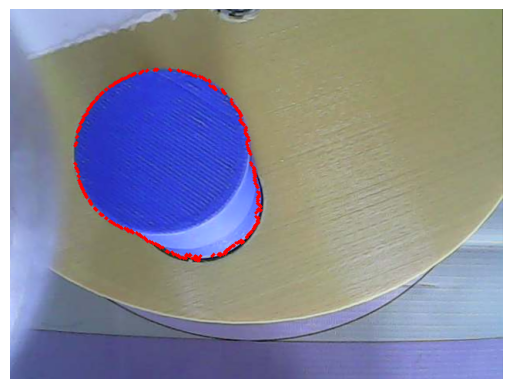

In [26]:
contours, hierarchy = cv2.findContours(inRange_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

res_con = []
for contour in contours:
    if len(contour) > len(res_con):
        res_con = contour

x, y, w, h = cv2.boundingRect(res_con)
print(x,y)

con_img = cv2.drawContours(dst, res_con, -1, (0, 0, 255), 3)

img_show(con_img)